# Flight Price Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading Dataset

In [2]:
data = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv' , sep = ',' , encoding = 'utf-8')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Data Exploration

## .head()

#### show first five rows in dataset

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## .tail()

#### show last five rows in dataset

In [4]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


## .sample()

#### take random sample from dataset

In [5]:
data.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
246931,246931,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,Business,14.17,28,50361
90019,90019,AirAsia,I5-339,Bangalore,Night,one,Morning,Delhi,Economy,10.75,31,3467
90440,90440,AirAsia,I5-992,Bangalore,Night,one,Morning,Delhi,Economy,10.92,33,2723
228335,228335,Vistara,UK-873,Mumbai,Early_Morning,one,Afternoon,Delhi,Business,9.33,34,41269
240299,240299,Vistara,UK-930,Mumbai,Early_Morning,one,Evening,Hyderabad,Business,12.42,33,60365
223956,223956,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,Business,10.42,34,52392
50105,50105,GO_FIRST,G8-7537,Mumbai,Afternoon,zero,Evening,Delhi,Economy,2.08,37,2339
138195,138195,Indigo,6E-822,Kolkata,Morning,zero,Afternoon,Bangalore,Economy,2.75,21,4452
100916,100916,Vistara,UK-816,Bangalore,Morning,one,Night,Mumbai,Economy,8.58,39,7212
205504,205504,Air_India,AI-430,Chennai,Morning,one,Evening,Hyderabad,Economy,9.42,36,3979


## .shape

#### to know how many rows and columns form dataset

In [6]:
data.shape

(300153, 12)

## .info()

#### information about dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## Data Cleaning

## .isnull().sum()

#### to check nulls in each column

In [8]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## .duplicate

#### to check duplicates 

In [9]:
data.duplicated().sum()

0

## .drop()

#### to drop row or column or multiple rows or columns

In [10]:
data.drop('Unnamed: 0',axis = 1 , inplace = True)

## .nunique()

#### to know total number of unique values in each column in our dataframe

In [11]:
data.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

## .map()

#### to make encoding - means to convert from categorical value to numerical

In [12]:
data['encoded_stops'] = data['stops'].map({'zero':0,
                                           'one':1,
                                          'two_or_more':2})

In [13]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0


## .describe()

#### to know statistical description for Numerical columns

In [14]:
data.describe()[['duration' , 'days_left' , 'price']].T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [15]:
data.describe(include = 'O').T

,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


## Check Distributions for Numerical Columns

<Axes: xlabel='duration', ylabel='Count'>

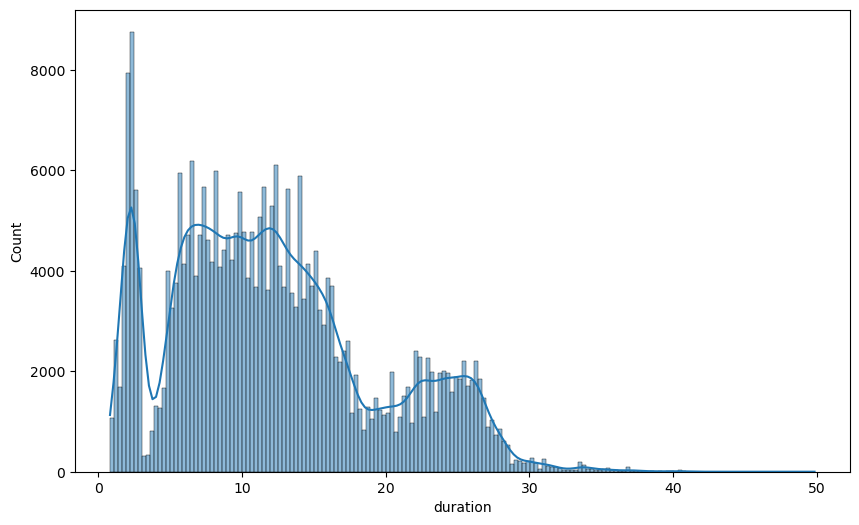

In [16]:
plt.figure(figsize = (10,6))
sns.histplot(data=data, x="duration" , kde = 'dist')

### Conc: number of passengers decrease when duration of flight increase

<Axes: xlabel='days_left', ylabel='Count'>

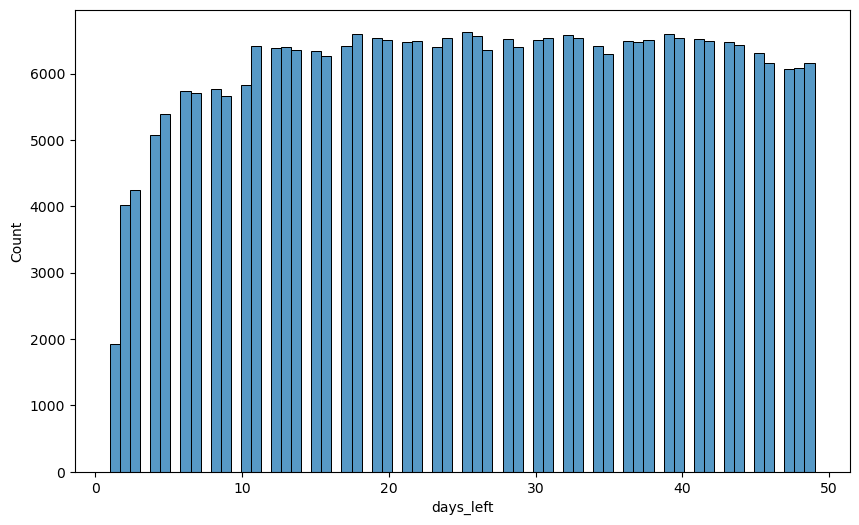

In [17]:
plt.figure(figsize = (10,6))
sns.histplot(data=data, x="days_left")

### Conc: most of passengers book the tickets before thier flight trip interval between [50,10] days

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

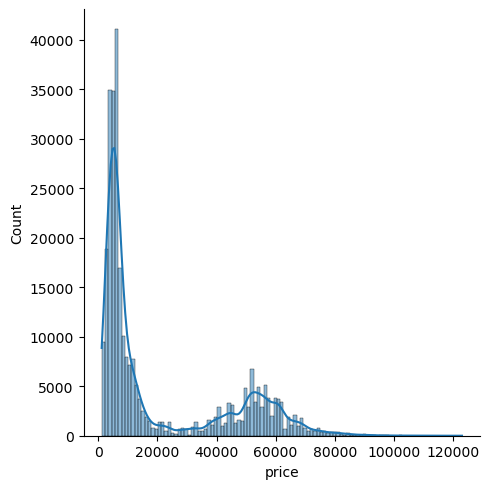

In [18]:
plt.figure(figsize = (10,6))
sns.displot(data=data, x="price" , kde = 'hist')

### Conc: we have a passengers thier tickets more than 20000 so we want to know what the class they are belong and thier airline

## Check there is Outliers in Numerical Columns

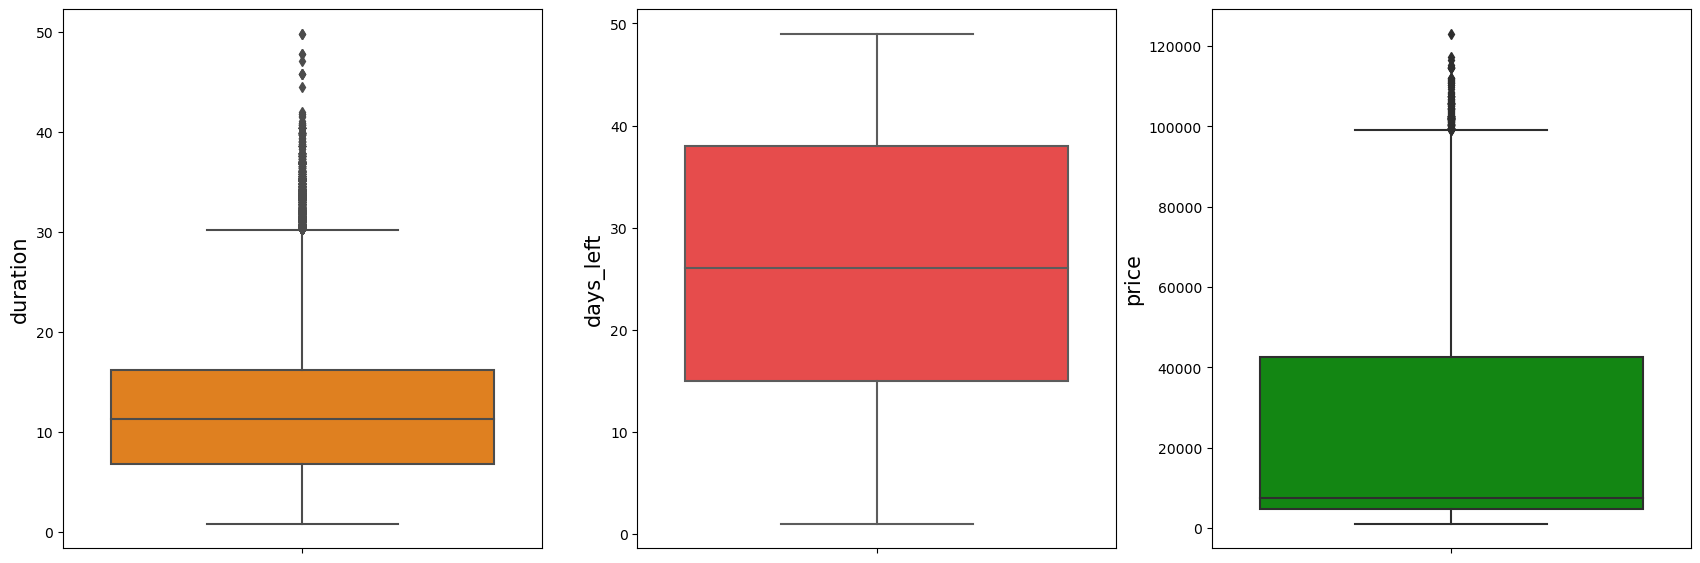

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(21,7))
sns.boxplot(data=data, y="duration" , color ='#FF8000' , ax = ax1)
sns.boxplot(data=data, y="days_left" , color ='#FF3333', ax = ax2)
sns.boxplot(data=data, y="price" , color ='#009900', ax = ax3)
for ax in plt.gcf().axes:
    l = ax.get_ylabel()
    ax.set_ylabel(l, fontsize=15)
plt.show()

### Conc: we notice we have outliers in duration and price columns

# Questions

### 1.what is the ratio between Bussiness and Economy?

In [20]:
round((data['class'].value_counts()/data.shape[0])*100,1)

Economy     68.9
Business    31.1
Name: class, dtype: float64

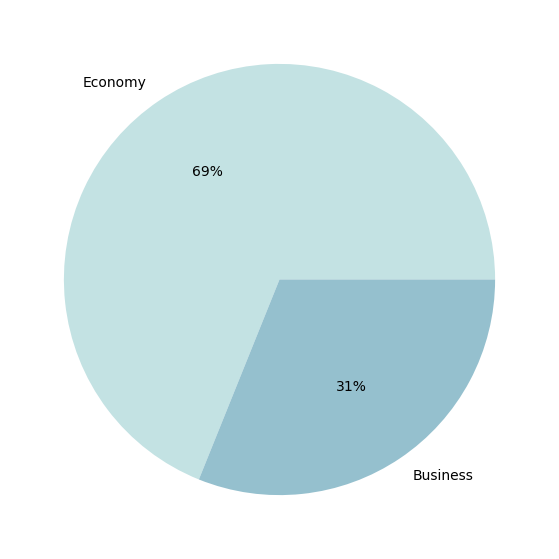

In [21]:
colors = sns.color_palette("ch:start=.2,rot=-.3")[0:5]
plt.figure (figsize=(10,7))
plt.pie(round((data['class'].value_counts()/data.shape[0])*100,1), labels = data['class'].unique(), colors = colors, autopct='%.0f%%')
plt.show()

### Conc: most of passengers that books ticket are Economy Class

### 2.- which class that i get more profit from it?

In [22]:
data.groupby(['class']).sum().sort_values('price',ascending = False)['price']

/tmp/ipykernel_20/3236915282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['class']).sum().sort_values('price',ascending = False)['price']


class
Business    4911814564
Economy     1358279711
Name: price, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


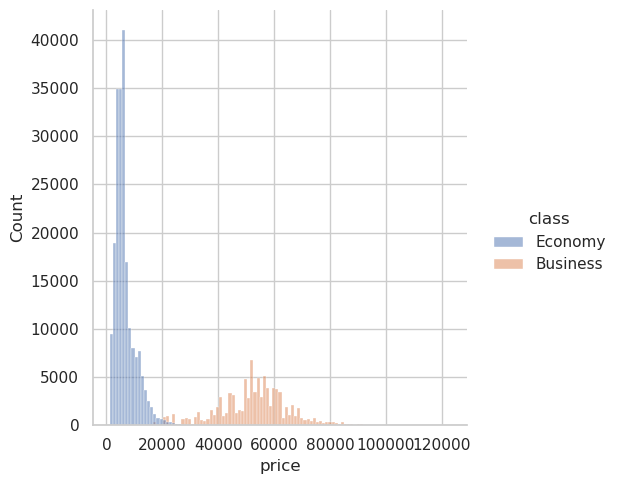

In [23]:
sns.set(style="whitegrid")
sns.displot(data=data, x="price", hue="class" , kind = "hist")

### Conc: that tickets with high price Bussiness passengers book it so profit comes from bussiness greater than Economy

### 3.what is the ratio between different airlines?

In [24]:
df1 = round((data['airline'].value_counts()/data.shape[0])*100,1)
df1

Vistara      42.6
Air_India    27.0
Indigo       14.4
GO_FIRST      7.7
AirAsia       5.4
SpiceJet      3.0
Name: airline, dtype: float64

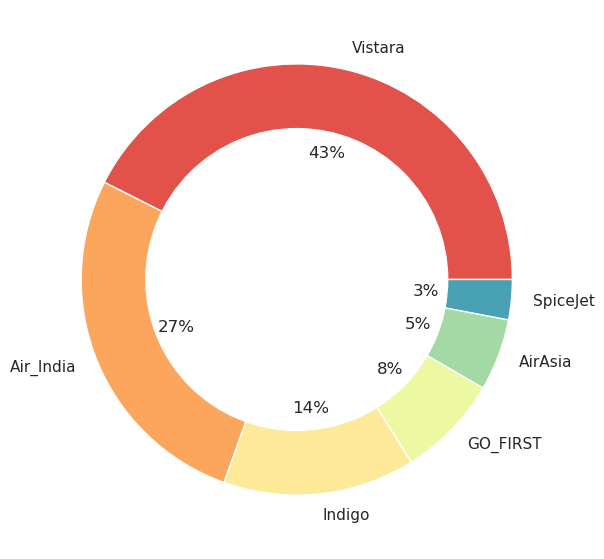

In [25]:
colors = sns.color_palette("Spectral")[0:25]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure (figsize=(10,7))
plt.pie(df1, labels =df1.index, colors = colors, autopct='%.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Conc: the top 2 airlines are Vistara and air-india and least airline is Spicejet

###  4.what is the ratio between different arrival_time and different departure_time?

In [26]:
# first departure_time
df2 = round((data['departure_time'].value_counts()/data.shape[0])*100,1)
df2

Morning          23.7
Early_Morning    22.3
Evening          21.7
Night            16.0
Afternoon        15.9
Late_Night        0.4
Name: departure_time, dtype: float64

In [27]:
# second arrival_time
df3 = round((data['arrival_time'].value_counts()/data.shape[0])*100,1)
df3

Night            30.5
Evening          26.1
Morning          20.9
Afternoon        12.7
Early_Morning     5.1
Late_Night        4.7
Name: arrival_time, dtype: float64

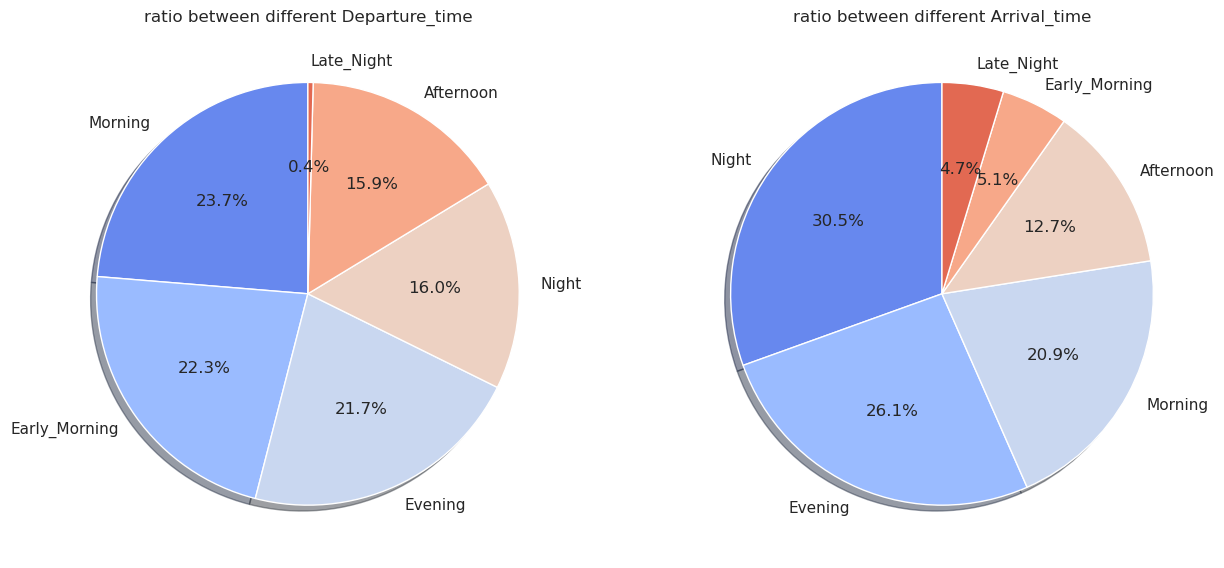

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
colors = sns.color_palette("coolwarm")[0:25]
plt.pie(df2,labels=df2.index, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90 )
plt.title('ratio between different Departure_time')
plt.subplot(1, 2, 2)
colors = sns.color_palette("coolwarm")[0:25]
plt.pie(df3,labels=df3.index, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90 )
plt.title('ratio between different Arrival_time')
plt.show()

### Conc: Most of passengers their departure_time is Morning and arrival_time is Night  

### 5.what is the ratio between different source cities and different destination cities?

In [29]:
# first source_city
sr_city = round((data['source_city'].value_counts()/data.shape[0])*100,1).sort_values(ascending = True)
sr_city

Chennai      12.9
Hyderabad    13.6
Kolkata      15.4
Bangalore    17.3
Mumbai       20.3
Delhi        20.4
Name: source_city, dtype: float64

In [30]:
# second destination_city
dest_city = round((data['destination_city'].value_counts()/data.shape[0])*100,1).sort_values(ascending = True)
dest_city

Chennai      13.4
Hyderabad    14.2
Kolkata      16.5
Bangalore    17.0
Delhi        19.1
Mumbai       19.7
Name: destination_city, dtype: float64

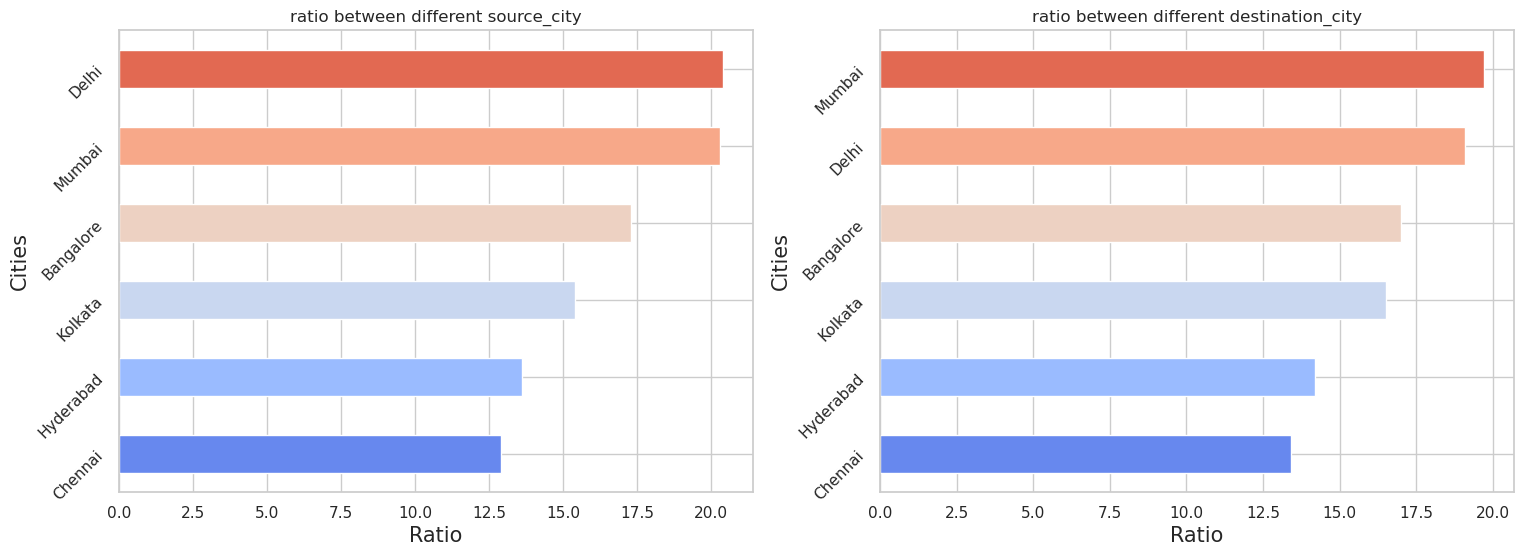

In [31]:
plt.figure(figsize = (18,6))
plt.subplot(1, 2, 1)
colors = sns.color_palette("coolwarm")[0:25]
sr_city.plot(kind='barh', color=colors)
plt.title("ratio between different source_city")
plt.xlabel("Ratio" , fontsize = 15)
plt.ylabel("Cities", fontsize = 15)
plt.yticks(rotation =45)

plt.subplot(1, 2, 2)
colors = sns.color_palette("coolwarm")[0:25]
dest_city.plot(kind='barh', color=colors)
plt.title("ratio between different destination_city")
plt.xlabel("Ratio" , fontsize = 15)
plt.ylabel("Cities", fontsize = 15)
plt.yticks(rotation =45)

plt.show()

### Conc: the most popular source_city for passenger is Delhi and destination one is Mumbai

### 6.what is the ratio between Number of stops?

In [32]:
round((data['encoded_stops'].value_counts()/data.shape[0])*100,1).sort_values(ascending = False)

1    83.6
0    12.0
2     4.4
Name: encoded_stops, dtype: float64

<Axes: xlabel='encoded_stops', ylabel='count'>

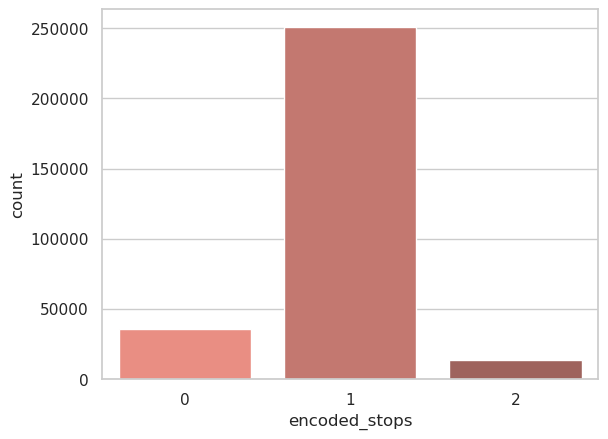

In [33]:
colors = sns.color_palette("dark:salmon_r")
sns.countplot(x = data['encoded_stops'] ,palette = colors )

### Conc: Most of passengers has one stops only

### 7.what is Top four flight code, the class include and which airline it belongs to?

In [34]:
data['flight'].value_counts().head(5)

UK-706    3235
UK-772    2741
UK-720    2650
UK-836    2542
UK-822    2468
Name: flight, dtype: int64

In [35]:
data2 = data[(data['flight'] == 'UK-706') | (data['flight'] == 'UK-772') | (data['flight'] == 'UK-720') | (data['flight'] == 'UK-836') | (data['flight'] == 'UK-822')]
data2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops
216,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,2,15038,1
378,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,3,19238,1
462,Vistara,UK-706,Delhi,Afternoon,one,Morning,Mumbai,Economy,21.83,4,9000,1
484,Vistara,UK-706,Delhi,Afternoon,one,Night,Mumbai,Economy,7.92,4,10575,1
637,Vistara,UK-706,Delhi,Afternoon,one,Morning,Mumbai,Economy,21.83,5,9000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300117,Vistara,UK-822,Chennai,Morning,one,Night,Hyderabad,Business,11.17,49,41064,1
300122,Vistara,UK-822,Chennai,Morning,one,Early_Morning,Hyderabad,Business,22.08,49,41064,1
300126,Vistara,UK-822,Chennai,Morning,one,Afternoon,Hyderabad,Business,26.50,49,41064,1
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,1


In [36]:
data2['class'].value_counts()

Economy     7386
Business    6250
Name: class, dtype: int64

In [37]:
data2['airline'].unique()

array(['Vistara'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK-706'),
  Text(1, 0, 'UK-772'),
  Text(2, 0, 'UK-720'),
  Text(3, 0, 'UK-836'),
  Text(4, 0, 'UK-822')])

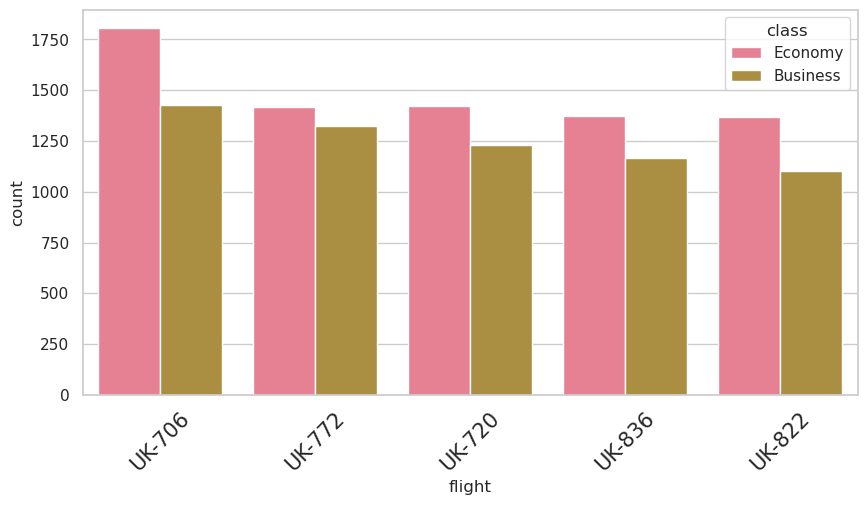

In [38]:
plt.figure(figsize=(10,5))
colors = sns.color_palette("husl")
sns.countplot(data=data2, x="flight", hue="class" ,palette = colors )
plt.xticks(rotation = 45 ,fontsize = 15)

### Conc: the flight codes with high numbers passengers in it all belongs to vistara airline and it include both business and economy class

### 8.which airline that contains VIP passengers?

In [39]:
data_business = data[data['class'] == 'Business']
data_business

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612,0
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612,0
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,1
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,1
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,1
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,1
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,1
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,1


In [40]:
data_business['flight'].value_counts()

UK-706    1429
UK-772    1322
UK-720    1230
UK-874    1202
UK-870    1178
          ... 
AI-583       2
AI-891       2
AI-801       2
AI-487       2
AI-437       1
Name: flight, Length: 295, dtype: int64

In [41]:
d_vip = data_business['flight'].value_counts().tail(10)
d_vip

AI-861    5
AI-627    4
AI-551    3
UK-641    3
AI-433    3
AI-583    2
AI-891    2
AI-801    2
AI-487    2
AI-437    1
Name: flight, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'AI-861'),
  Text(1, 0, 'AI-627'),
  Text(2, 0, 'AI-551'),
  Text(3, 0, 'UK-641'),
  Text(4, 0, 'AI-433'),
  Text(5, 0, 'AI-583'),
  Text(6, 0, 'AI-891'),
  Text(7, 0, 'AI-801'),
  Text(8, 0, 'AI-487'),
  Text(9, 0, 'AI-437')])

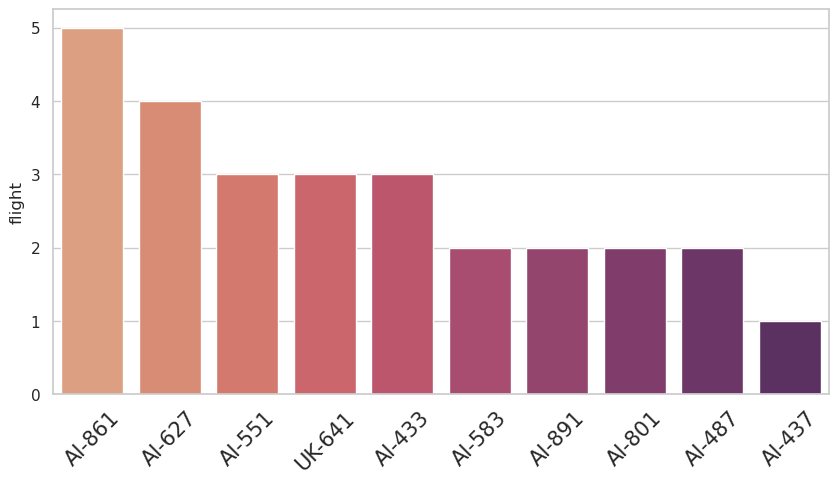

In [42]:
plt.figure(figsize = (10,5))
colors = sns.color_palette("flare", 10)
sns.barplot(data=data_business, x=d_vip.index, y=d_vip ,palette = colors)
plt.xticks(rotation = 45 ,fontsize = 15)

### Conc: Vip passengers treat with Air_India airline

####  <font color = 'red'>Which airline that AI flight code belongs to? --- > For check </font> 

In [43]:
AI_flightcode = []
def get_AI():
    for sym in data_business['flight']:
        if sym.split('-')[0] == 'AI':
            AI_flightcode.append('AI')
        else:
            AI_flightcode.append('Not-AI')      

In [44]:
get_AI()

In [45]:
data_business['AI_flightcode'] = AI_flightcode

/tmp/ipykernel_20/4122337971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_business['AI_flightcode'] = AI_flightcode


In [46]:
data_business

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops,AI_flightcode
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612,0,AI
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612,0,AI
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,1,AI
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,1,AI
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,1,AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,1,Not-AI
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,1,Not-AI
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,1,Not-AI
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,1,Not-AI


In [47]:
AI_airline = data_business[data_business['AI_flightcode'] == 'AI']

In [48]:
AI_airline

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops,AI_flightcode
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612,0,AI
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612,0,AI
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,1,AI
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,1,AI
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,1,AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300143,Air_India,AI-440,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.42,49,51345,1,AI
300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345,1,AI
300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345,1,AI
300146,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345,1,AI


In [49]:
AI_airline['airline'].unique()

array(['Air_India'], dtype=object)

### Conc: <font color= 'red' >AI is notation for Air-india airline</font>

### 9.Is no of stops increase when the duration increase?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


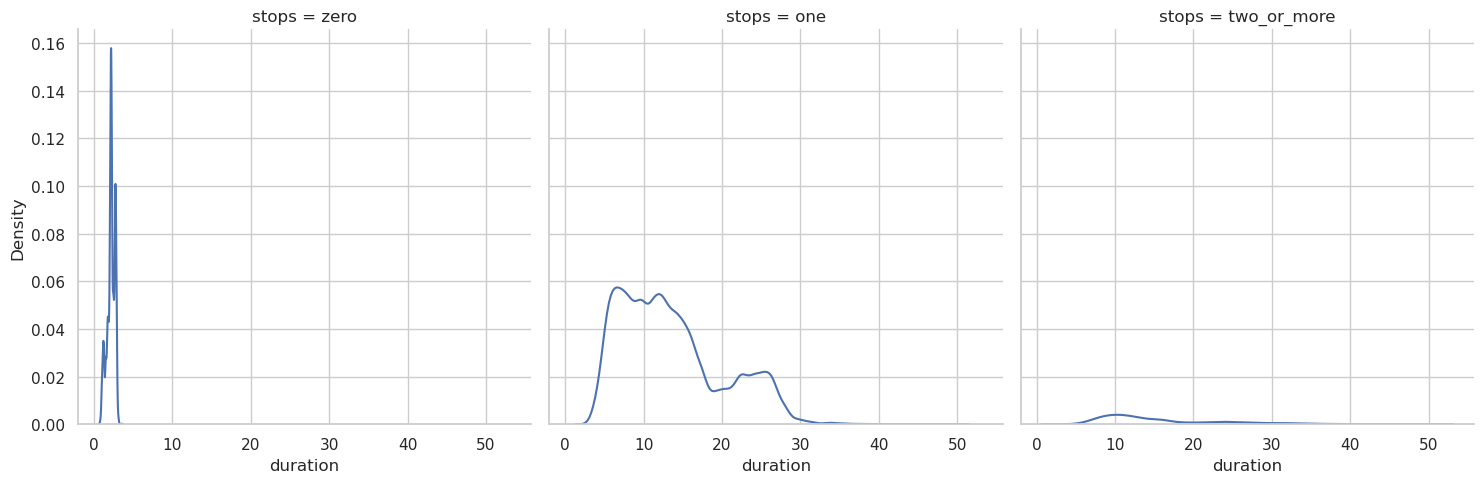

In [50]:
sns.set(style="whitegrid")
sns.displot(data=data, x="duration", col="stops" , kind = "kde")

### Conc : yes there is postive correlation between them when no of stops increase duration increase

### 10. How many bussiness class passengers thier number of stops is equal two?

In [51]:
sum(data_business['encoded_stops'] == 2) ## to get total number of rows in bussiness data and when no of stops equal 2

1083

In [52]:
round((sum(data_business['encoded_stops'] == 2)/data_business.shape[0])*100,1)

1.2

<Axes: title={'center': 'number of Business passengers for each stop'}, xlabel='encoded_stops', ylabel='count'>

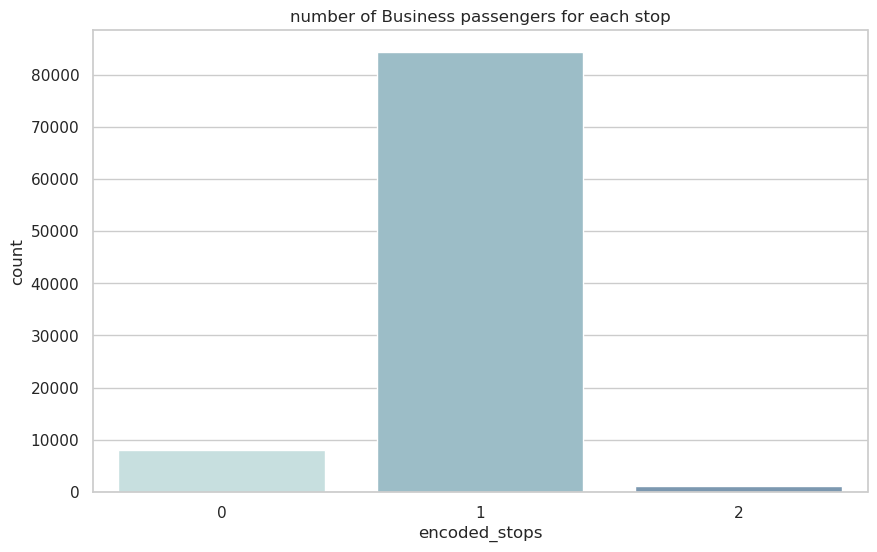

In [53]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("ch:start=.2,rot=-.3")
plt.title("number of Business passengers for each stop" ,  loc='center')
sns.countplot(x=data_business["encoded_stops"] , palette = colors)

### Conc: Bussiness passengers prefers one stop and number of bussiness passengers that prefer 2 stops they have a little ratio is 1.2%

### 11.which airline that most of derpature_time is late night and that affects on its profit?

In [54]:
lost_air = data[data['departure_time'] == 'Late_Night']
lost_air

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops
1671,GO_FIRST,G8-2501,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.25,11,5954,0
1678,Indigo,6E-171,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.17,11,5955,0
1888,GO_FIRST,G8-2501,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.25,12,5954,0
1895,Indigo,6E-171,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.17,12,5955,0
2104,GO_FIRST,G8-2501,Delhi,Late_Night,zero,Early_Morning,Mumbai,Economy,2.25,13,5954,0
...,...,...,...,...,...,...,...,...,...,...,...,...
260464,Air_India,AI-748,Bangalore,Late_Night,one,Night,Chennai,Business,20.50,34,44682,1
260568,Air_India,AI-748,Bangalore,Late_Night,one,Evening,Chennai,Business,17.00,36,44682,1
260728,Air_India,AI-748,Bangalore,Late_Night,one,Evening,Chennai,Business,17.00,39,44682,1
260833,Air_India,AI-748,Bangalore,Late_Night,one,Night,Chennai,Business,20.50,41,44682,1


In [55]:
lost_air['airline'].value_counts()

Indigo       726
Air_India    291
GO_FIRST     146
AirAsia      143
Name: airline, dtype: int64

In [56]:
(lost_air['airline'].value_counts()/data.shape[0])*100

Indigo       0.241877
Air_India    0.096951
GO_FIRST     0.048642
AirAsia      0.047642
Name: airline, dtype: float64

### Conc: there isn't airline most of thier depature time is late_night because very little passengeers travels late_night and there is airlines hasn't depature time late_night so the depature time not affect on profit for airline

### 12.what is destination city for passengers whose thier derpature_time is late_night?

In [57]:
lost_air['destination_city'].value_counts()

Delhi        374
Kolkata      370
Mumbai       231
Bangalore    143
Chennai      121
Hyderabad     67
Name: destination_city, dtype: int64

In [58]:
df5= round((lost_air['destination_city'].value_counts()/lost_air.shape[0])*100,1)
df5

Delhi        28.6
Kolkata      28.3
Mumbai       17.7
Bangalore    10.9
Chennai       9.3
Hyderabad     5.1
Name: destination_city, dtype: float64

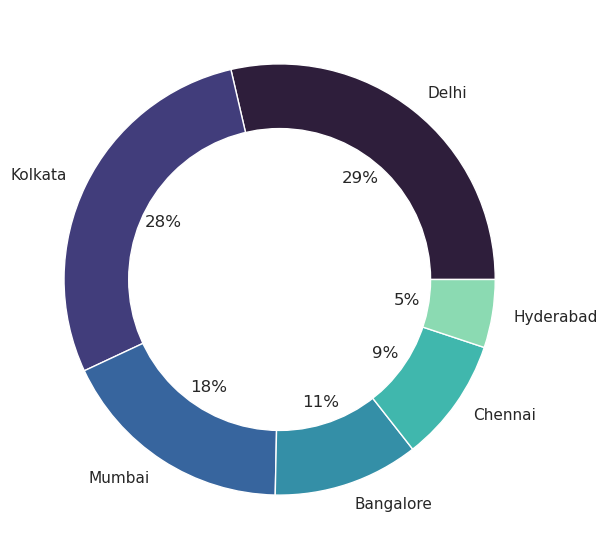

In [59]:
colors = sns.color_palette("mako")[0:25]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure (figsize=(10,7))
plt.pie(df5, labels =df5.index, colors = colors, autopct='%.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Conc: we see that destination cities like chennai and Hyderabad there is alittle number of passengers go there which mean this cities not crowded at late_night so we can make offers for this segment of the passengers

### 13.Depending on the correlation matrix, which variables have a strong relationship with each other?

In [60]:
data.corr()

/tmp/ipykernel_20/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,duration,days_left,price,encoded_stops
duration,1.000000,-0.039157,0.204222,0.468059
days_left,-0.039157,1.000000,-0.091949,-0.008540
price,0.204222,-0.091949,1.000000,0.119648
encoded_stops,0.468059,-0.008540,0.119648,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


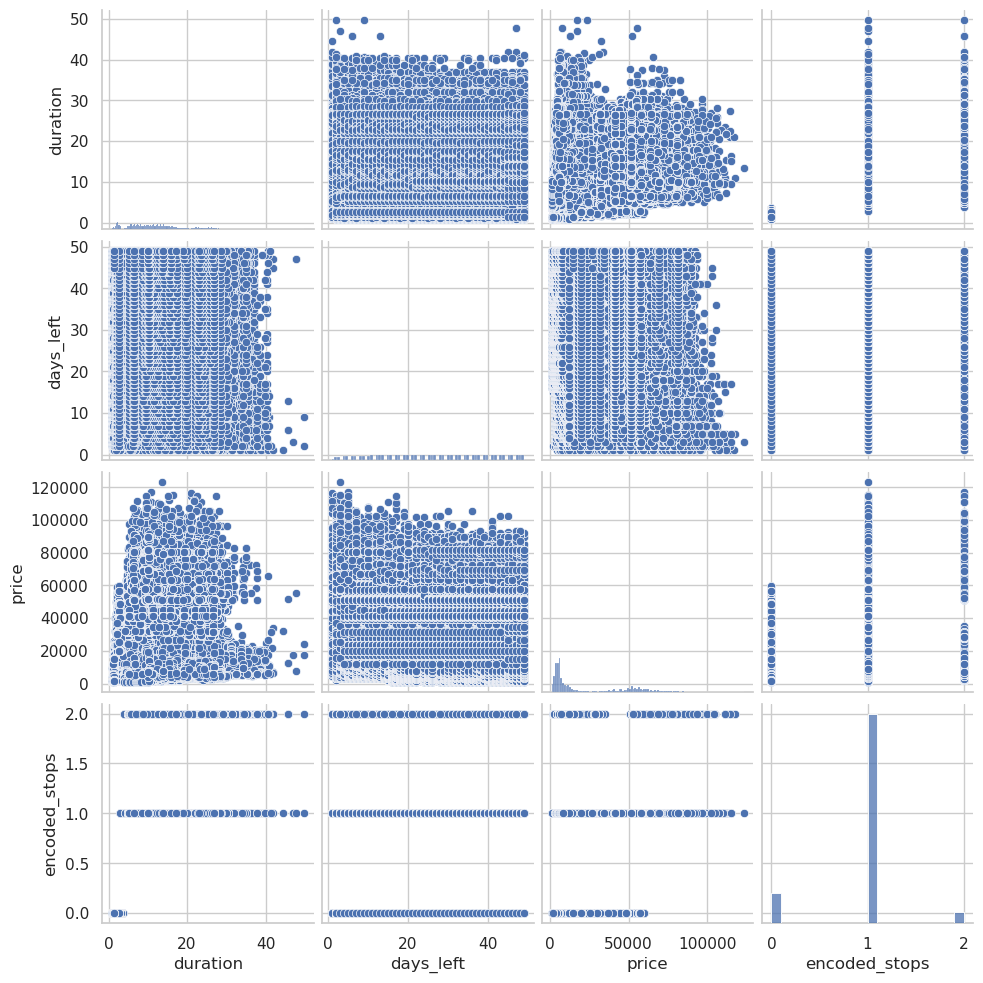

In [61]:
sns.pairplot(data)

/tmp/ipykernel_20/1867585713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True ,cmap=sns.color_palette('Blues',as_cmap=True))


<Axes: >

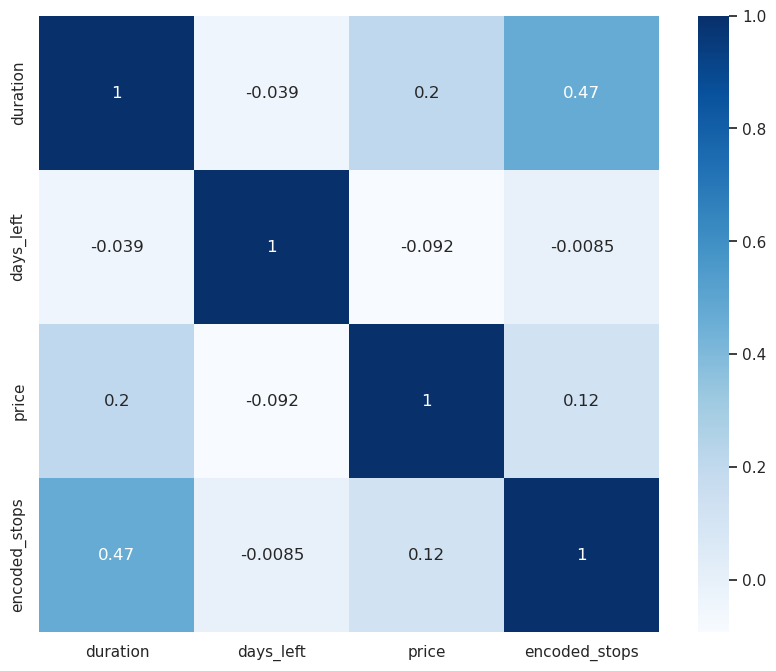

In [62]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot=True ,cmap=sns.color_palette('Blues',as_cmap=True))

### Conc : the strongest correlation is the correlation between number of stops and duration

### 14.From the previous question,What is the relationship between duration and price?

In [63]:
# we want first check max and min values in duration
data['duration'].agg(['min','max'])

min     0.83
max    49.83
Name: duration, dtype: float64

In [64]:
# Define the bin range
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45,50, 55, 60, 70, 80, 90]

# Create a new column 'dur_range' with the binned values
data['dur_range'] = pd.cut(data['duration'], bins=bins)

In [65]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops,dur_range
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,"(0, 5]"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,"(0, 5]"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,"(0, 5]"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,"(0, 5]"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,"(0, 5]"


Text(0, 0.5, 'Count')

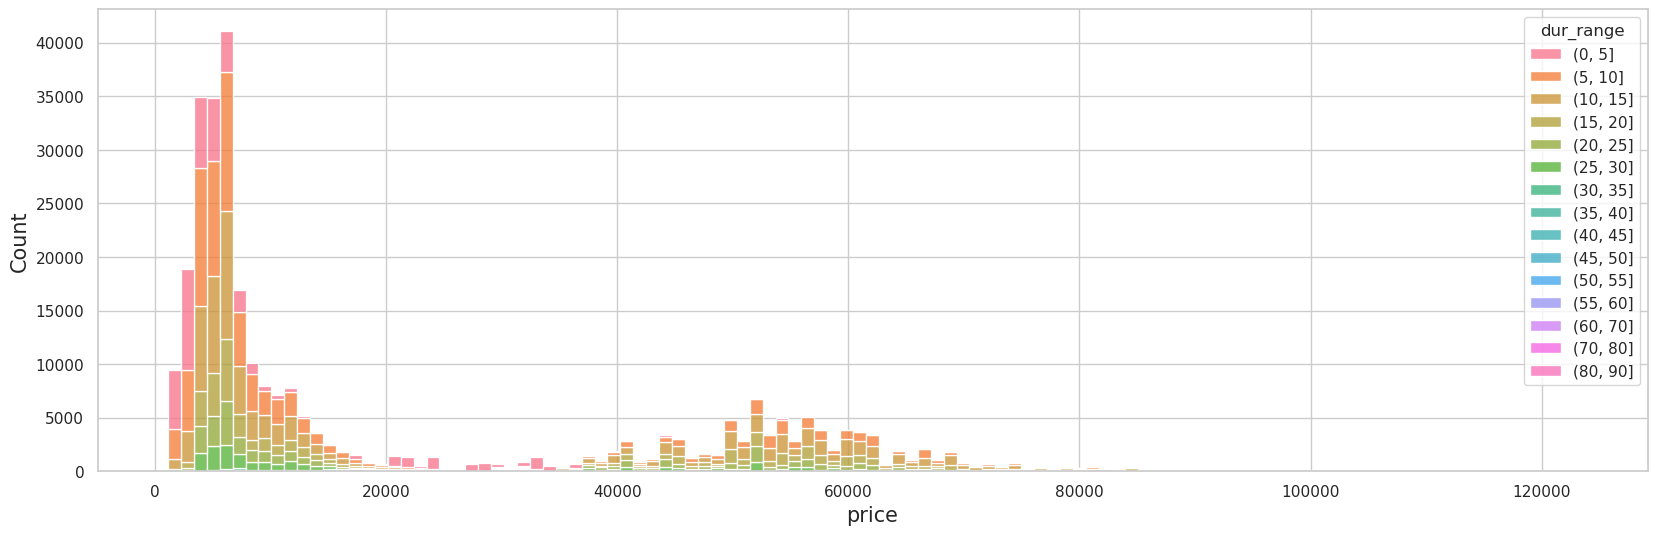

In [66]:
plt.figure(figsize =(20,6))
sns.histplot(data=data, x="price", hue="dur_range" , multiple="stack")
plt.xlabel('price',fontsize=15)
plt.ylabel('Count',fontsize=15)

### Conc: there isn't big relation between duration and price

### 15.From the previous question,What is the relationship between price and daysleft?

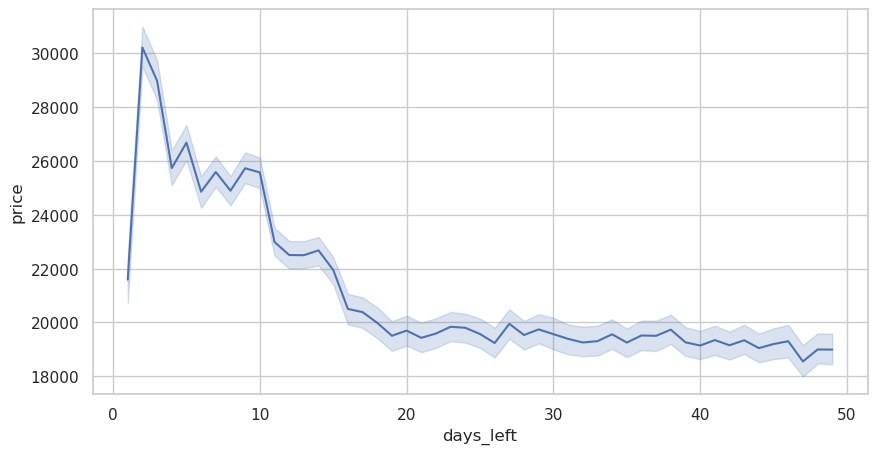

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(data = data,x='days_left', y='price')
plt.show()

### Conc: when the days_left decrease the price increase as graph shown when daysleft become smaller than 10  price increase

# Offers

## <font color = 'red'>Passenger should choose only one offer </font>

### We want to give offers according to  duration, and we will explain that Using Visulization [Offer_1]

In [68]:
def duration_offer(row):
    if row['duration'] <= 10.0 and row['duration'] >=0.0:
        return 'No offer'
    elif row['duration'] > 10.0 and row['duration'] <= 20.0:
        return 'One Extra Bag for free'
    else:
        return ('discount 2.5% from ticket price')

In [69]:
data['duration_offer'] = data.apply(duration_offer , axis = 1)

In [70]:
data.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops,dur_range,duration_offer
260302,Vistara,UK-866,Bangalore,Night,one,Night,Chennai,Business,25.42,31,44280,1,"(25, 30]",discount 2.5% from ticket price
124387,Air_India,AI-732,Kolkata,Afternoon,one,Night,Delhi,Economy,10.75,31,5467,1,"(10, 15]",One Extra Bag for free
184432,SpiceJet,SG-612,Chennai,Night,one,Afternoon,Delhi,Economy,14.83,30,4048,1,"(10, 15]",One Extra Bag for free
78588,Vistara,UK-950,Mumbai,Night,one,Evening,Chennai,Economy,18.42,11,11129,1,"(15, 20]",One Extra Bag for free
149279,SpiceJet,SG-516,Kolkata,Early_Morning,one,Early_Morning,Chennai,Economy,25.75,16,4571,1,"(25, 30]",discount 2.5% from ticket price
44315,Vistara,UK-851,Mumbai,Early_Morning,one,Afternoon,Delhi,Economy,5.67,9,12138,1,"(5, 10]",No offer
97892,Vistara,UK-816,Bangalore,Morning,one,Night,Mumbai,Economy,11.33,23,6883,1,"(10, 15]",One Extra Bag for free
215470,Vistara,UK-927,Delhi,Morning,one,Night,Bangalore,Business,13.33,44,49177,1,"(10, 15]",One Extra Bag for free
137302,SpiceJet,SG-3839,Kolkata,Evening,one,Night,Bangalore,Economy,27.17,15,6488,1,"(25, 30]",discount 2.5% from ticket price
134252,Vistara,UK-774,Kolkata,Night,zero,Night,Mumbai,Economy,2.92,42,4499,0,"(0, 5]",No offer


In [71]:
data['duration_offer'].value_counts()

No offer                           130274
One Extra Bag for free             119124
discount 2.5% from ticket price     50755
Name: duration_offer, dtype: int64

In [72]:
round((data['duration_offer'].value_counts()/data.shape[0])*100,1)

No offer                           43.4
One Extra Bag for free             39.7
discount 2.5% from ticket price    16.9
Name: duration_offer, dtype: float64

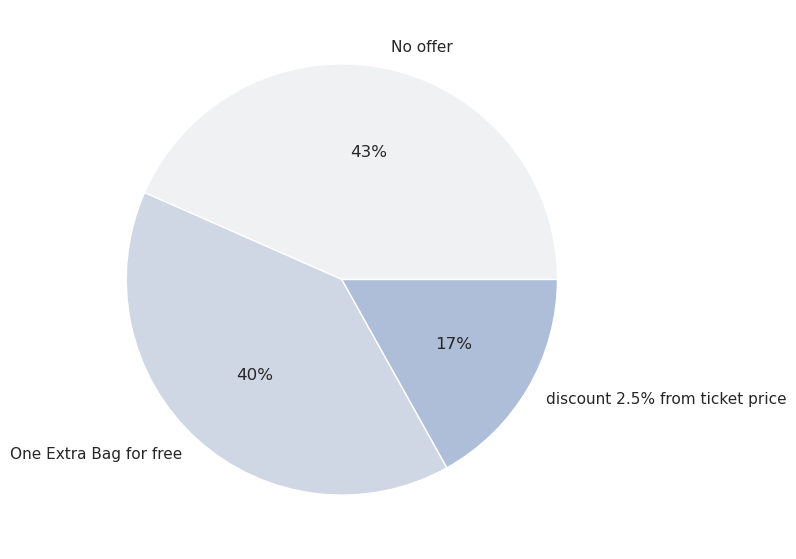

In [73]:
colors = sns.color_palette("light:b")[0:5]
plt.figure (figsize=(10,7))
plt.pie(round((data['duration_offer'].value_counts()/data.shape[0])*100,1), labels = data['duration_offer'].unique(), colors = colors, autopct='%.0f%%')
plt.show()

### Conc: 40 % will get bag offer and 17% will get 2.5% discount

### We want to give offers according to arrival time, we will explain that Using Visulization [offer_2]

<Axes: xlabel='arrival_time', ylabel='count'>

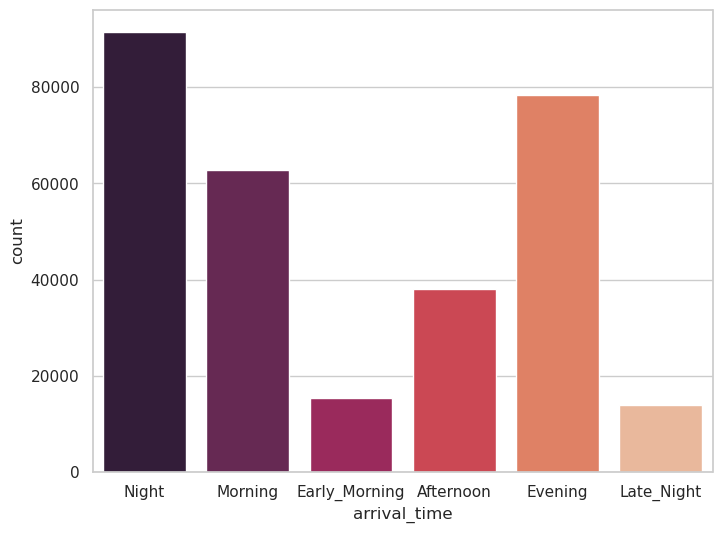

In [74]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("rocket")[0:25]
sns.countplot(x=data["arrival_time"] , palette = colors)

### Conc : the least two arrivals times early_morning and late_Night we will make offers for them

In [75]:
def arrival_offer(row):
    if  row['arrival_time'] == 'Late_Night' or row['arrival_time'] == 'Late_Night':
        return 'free taxi'
    else:
        return 'No Offer'

In [76]:
data['arrival_offer'] = data.apply(arrival_offer , axis = 1)

In [77]:
data.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops,dur_range,duration_offer,arrival_offer
133140,Air_India,AI-402,Kolkata,Morning,one,Evening,Mumbai,Economy,30.00,35,9172,1,"(25, 30]",discount 2.5% from ticket price,No Offer
65451,SpiceJet,SG-163,Mumbai,Afternoon,one,Afternoon,Kolkata,Economy,25.33,23,14348,1,"(25, 30]",discount 2.5% from ticket price,No Offer
233918,Vistara,UK-970,Mumbai,Morning,one,Night,Bangalore,Business,13.92,46,69168,1,"(10, 15]",One Extra Bag for free,No Offer
133291,Indigo,6E-6488,Kolkata,Morning,one,Evening,Mumbai,Economy,4.67,36,6521,1,"(0, 5]",No offer,No Offer
143809,Indigo,6E-135,Kolkata,Morning,one,Evening,Hyderabad,Economy,5.58,14,9377,1,"(5, 10]",No offer,No Offer
61005,AirAsia,I5-330,Mumbai,Night,one,Morning,Bangalore,Economy,11.75,47,2074,1,"(10, 15]",One Extra Bag for free,No Offer
266398,Air_India,AI-763,Kolkata,Early_Morning,one,Evening,Mumbai,Business,11.00,36,50271,1,"(10, 15]",One Extra Bag for free,No Offer
112328,Vistara,UK-812,Bangalore,Morning,one,Night,Hyderabad,Economy,13.17,24,6133,1,"(10, 15]",One Extra Bag for free,No Offer
28819,AirAsia,I5-798,Delhi,Afternoon,one,Evening,Hyderabad,Economy,6.58,1,14040,1,"(5, 10]",No offer,No Offer
24388,Vistara,UK-985,Delhi,Evening,one,Evening,Kolkata,Economy,21.00,25,6578,1,"(20, 25]",discount 2.5% from ticket price,No Offer


In [78]:
data['arrival_offer'].value_counts()

No Offer     286152
free taxi     14001
Name: arrival_offer, dtype: int64

In [79]:
round((data['arrival_offer'].value_counts()/data.shape[0])*100,1)

No Offer     95.3
free taxi     4.7
Name: arrival_offer, dtype: float64

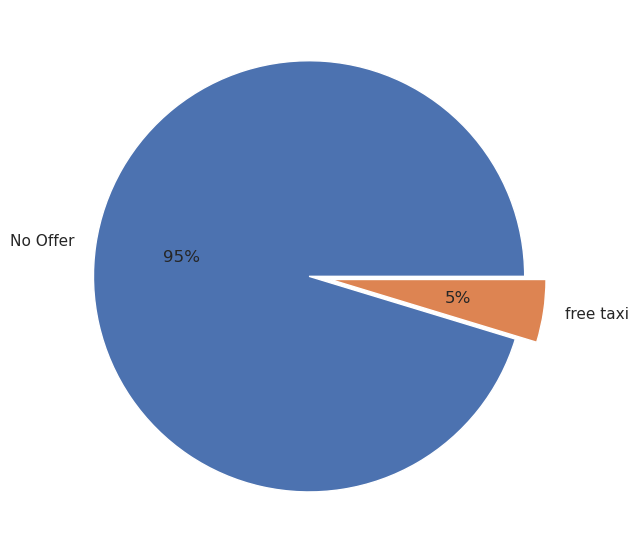

In [80]:
explode = (0.1,0)
plt.figure (figsize=(10,7))
plt.pie(round((data['arrival_offer'].value_counts()/data.shape[0])*100,1), labels = data['arrival_offer'].unique(), explode = explode, autopct='%.0f%%')
plt.show()

### Conc: this offer will statisfy for segment of passengers and will be suitable for company 

### we want to give offers according to less desination cities , to encourage passengers to go there [offer_3]

<Axes: xlabel='destination_city', ylabel='count'>

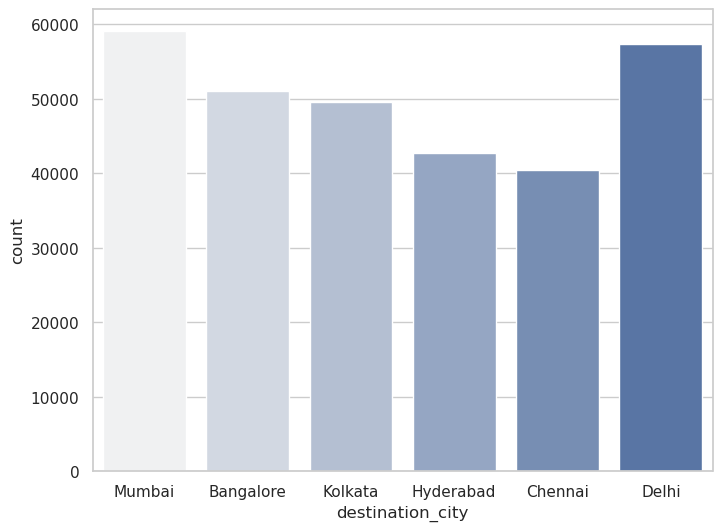

In [81]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("light:b")[0:25]
sns.countplot(x=data["destination_city"] , palette = colors)

### Conc : the least two destination cities Chennai and Hyderabad we will make offers for them to encourage passengers to go thier

In [82]:
def destination_offer(row):
    if  row['destination_city'] == 'Hyderabad' or row['destination_city'] == 'Chennai':
        return '2 day hotel for free'
    else:
        return 'No Offer'

In [83]:
data['destination_offer'] = data.apply(destination_offer , axis = 1)

In [84]:
data.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,encoded_stops,dur_range,duration_offer,arrival_offer,destination_offer
216866,Air_India,AI-767,Delhi,Afternoon,zero,Afternoon,Kolkata,Business,2.33,17,27976,0,"(0, 5]",No offer,No Offer,No Offer
7267,GO_FIRST,G8-392,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,37,2410,0,"(0, 5]",No offer,No Offer,No Offer
83891,Vistara,UK-910,Mumbai,Evening,one,Morning,Chennai,Economy,16.33,48,4683,1,"(15, 20]",One Extra Bag for free,No Offer,2 day hotel for free
126294,GO_FIRST,G8-295,Kolkata,Early_Morning,one,Evening,Delhi,Economy,12.00,42,6294,1,"(10, 15]",One Extra Bag for free,No Offer,No Offer
79649,Indigo,6E-5308,Mumbai,Afternoon,zero,Evening,Chennai,Economy,1.92,19,3000,0,"(0, 5]",No offer,No Offer,2 day hotel for free
227671,Air_India,AI-637,Mumbai,Evening,one,Night,Delhi,Business,5.33,28,31450,1,"(5, 10]",No offer,No Offer,No Offer
281747,Vistara,UK-874,Hyderabad,Morning,one,Morning,Bangalore,Business,24.33,28,38099,1,"(20, 25]",discount 2.5% from ticket price,No Offer,No Offer
266194,Air_India,AI-770,Kolkata,Night,one,Morning,Mumbai,Business,14.75,33,50271,1,"(10, 15]",One Extra Bag for free,No Offer,No Offer
75054,Air_India,AI-442,Mumbai,Afternoon,one,Night,Hyderabad,Economy,8.00,34,4593,1,"(5, 10]",No offer,No Offer,2 day hotel for free
259773,Vistara,UK-854,Bangalore,Evening,one,Morning,Chennai,Business,14.42,21,44280,1,"(10, 15]",One Extra Bag for free,No Offer,2 day hotel for free


In [85]:
data['destination_offer'].value_counts()

No Offer                217059
2 day hotel for free     83094
Name: destination_offer, dtype: int64

In [86]:
round((data['destination_offer'].value_counts()/data.shape[0])*100,1)

No Offer                72.3
2 day hotel for free    27.7
Name: destination_offer, dtype: float64

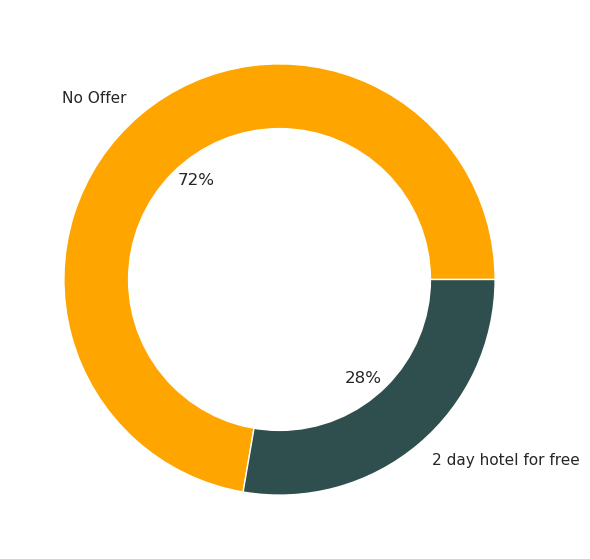

In [87]:
explode = (0,0)
plt.figure (figsize=(10,7))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(round((data['destination_offer'].value_counts()/data.shape[0])*100,1), labels = data['destination_offer'].unique(), explode = explode , colors = ['orange','#2F4F4F'], autopct='%.0f%%' )
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()